In [1]:
import os, sys
import esutil
import healpy as hp
import numpy as np
import fitsio
sys.path.append('../')
from xd import *
from run_DMASS_Y3 import *
from utils import *
import healpy as hp
from systematics import *
from cmass_modules import io
os.chdir('../../DMASS_XDGMM/code_py3/')
print(os.getcwd())
from xdgmm import XDGMM as XDGMM_Holoien
os.chdir('../../DMASSY3/code_py3/')
print(os.getcwd())

In /users/PCON0003/warner785/.conda/envs/DES_env/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In /users/PCON0003/warner785/.conda/envs/DES_env/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The verbose.level rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In /users/PCON0003/warner785/.conda/envs/DES_env/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The verbose.fileo rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.


/users/PCON0003/warner785/DMASS_XDGMM/code_py3
/users/PCON0003/warner785/DMASSY3/code_py3


In [2]:
#load in dmass model:
#clf_200 = XDGMM_Holoien(filename='output/test/fitting/gauss_gold_bovyY3_200DET_unfixed.xdgmm')
#clf_no200 = XDGMM_Holoien(filename='output/test/fitting/gauss_nogold_bovyY3_200DET_unfixed.xdgmm')

In [2]:
#loading in all of y3 gold:

input_path = '/fs/scratch/PCON0008/warner785/bwarner/'
#input_keyword = 'full_spt_'
input_keyword ='test_'
columns =  ['RA', 'DEC', 
            'HPIX_4096',     # Healpix in ring order, nside=4096
            'COADD_OBJECT_ID', 
            'SOF_CM_MAG_CORRECTED_G', # mag_[griz]
            'SOF_CM_MAG_CORRECTED_R',
            'SOF_CM_MAG_CORRECTED_I',
            'SOF_CM_MAG_CORRECTED_Z',
            'SOF_CM_MAG_ERR_G',       # mag error_[griz]
            'SOF_CM_MAG_ERR_R',
            'SOF_CM_MAG_ERR_I',
            'SOF_CM_MAG_ERR_Z', 'EXTENDED_CLASS_MASH_SOF', 'MAG_DETMODEL_G', 'MAG_DETMODEL_R', 'MAG_DETMODEL_I', 'MAG_DETMODEL_Z', 
            'MAGERR_DETMODEL_G', 'MAGERR_DETMODEL_R', 'MAGERR_DETMODEL_I', 'MAGERR_DETMODEL_Z']
gold = io.SearchAndCallFits(path = input_path, keyword = input_keyword, columns=columns)


Calling catalogs >>>
test_000001.fits
test_000002.fits
test_000003.fits
reading 1/3 /fs/scratch/PCON0008/warner785/bwarner/test_000001.fits
reading 2/3 /fs/scratch/PCON0008/warner785/bwarner/test_000002.fits
reading 3/3 /fs/scratch/PCON0008/warner785/bwarner/test_000003.fits


In [2]:
# Call in st82 region to take out this portion of the gold catalog:

# Calling Y3 GOLD v2.0 (training)
# All catalogs are in the 'input_path' directory 
# The 'SearchAndCallFits' function below loads all 
# catalogs in the directory including 'input_keyword' in its name
#input_path = '/n/des/lee.5922/data/gold_cat_Y3/STRIPE82/feae9705305d4430993687930f1cc3ad/'
input_path = '/fs/scratch/PCON0008/warner785/bwarner/gold_full/'
# call only first 9 catalogs for a fast run.
# to call all catalogs in the directory, use 'Y3_GOLD' as input_keyword 
# but that will consume huge memory
input_keyword = 'gold_st82_final'  
# Columns to call
columns =  ['RA', 'DEC', 
            'HPIX_4096',     # Healpix in ring order, nside=4096
            'COADD_OBJECT_ID', 
            'SOF_CM_MAG_CORRECTED_G', # mag_[griz]
            'SOF_CM_MAG_CORRECTED_R',
            'SOF_CM_MAG_CORRECTED_I',
            'SOF_CM_MAG_CORRECTED_Z',
            'SOF_CM_MAG_ERR_G',       # mag error_[griz]
            'SOF_CM_MAG_ERR_R',
            'SOF_CM_MAG_ERR_I',
            'SOF_CM_MAG_ERR_Z', 'EXTENDED_CLASS_MASH_SOF', 'MAG_DETMODEL_G', 'MAG_DETMODEL_R', 'MAG_DETMODEL_I', 'MAG_DETMODEL_Z', 
            'MAGERR_DETMODEL_G', 'MAGERR_DETMODEL_R', 'MAGERR_DETMODEL_I', 'MAGERR_DETMODEL_Z']
gold_st82 = io.SearchAndCallFits(path = input_path, keyword = input_keyword, columns=columns)

# Color/Magnitude cuts to exclude extremely high or low mag/color sources.
# 16 < mag_riz < 24, 0 < (r-i) < 1.5, 0 < (g-r) < 2.5
# These galaxies are less likeliy to be a CMASS, therefore unnecessary. 
# We apply these cuts to reduce the sample size to speed up the codes


Calling catalogs >>>
gold_st82_final_000056.fits
gold_st82_final_000003.fits
gold_st82_final_000026.fits
gold_st82_final_000121.fits
gold_st82_final_000094.fits
gold_st82_final_000040.fits
gold_st82_final_000010.fits
gold_st82_final_000082.fits
gold_st82_final_000068.fits
gold_st82_final_000075.fits
gold_st82_final_000103.fits
gold_st82_final_000112.fits
gold_st82_final_000043.fits
gold_st82_final_000125.fits
gold_st82_final_000083.fits
gold_st82_final_000101.fits
gold_st82_final_000016.fits
gold_st82_final_000031.fits
gold_st82_final_000041.fits
gold_st82_final_000052.fits
gold_st82_final_000092.fits
gold_st82_final_000027.fits
gold_st82_final_000127.fits
gold_st82_final_000095.fits
gold_st82_final_000114.fits
gold_st82_final_000079.fits
gold_st82_final_000045.fits
gold_st82_final_000086.fits
gold_st82_final_000007.fits
gold_st82_final_000029.fits
gold_st82_final_000055.fits
gold_st82_final_000076.fits
gold_st82_final_000069.fits
gold_st82_final_000105.fits
gold_st82_final_000100.fit

In [3]:
def keepGoodRegion(des, hpInd = False, balrog=None):
    import healpy as hp
    import fitsio
    # 25 is the faintest object detected by DES
    # objects larger than 25 considered as Noise
    
    path = '/fs/scratch/PCON0003/warner785/bwarner/'
    #LSSGoldmask = fitsio.read(path+'Y1LSSmask_v2_il22_seeil4.0_nside4096ring_redlimcut.fits')
    #LSSGoldmask = fitsio.read(path+'Y1LSSmask_v1_il22seeil4.04096ring_redlimcut.fits')
    LSSGoldmask = fitsio.read(path+'MASK_Y3LSSBAOSOF_22_3_v2p2.fits')
    ringhp = hp.nest2ring(4096, [LSSGoldmask['PIXEL']])
    #Y1LSSmask_v1_il22seeil4.04096ring_redlimcut.fits
    #frac_cut = LSSGoldmask['FRAC'] > 0.8
    #ind_good_ring = LSSGoldmask['PIXEL'][frac_cut]
    ind_good_ring = ringhp
    
    # healpixify the catalog.
    nside=4096
    # Convert silly ra/dec to silly HP angular coordinates.
    phi = des['RA'] * np.pi / 180.0
    theta = ( 90.0 - des['DEC'] ) * np.pi/180.0

    hpInd = hp.ang2pix(nside,theta,phi,nest=False)
    keep = np.in1d(hpInd, ind_good_ring)
    des = des[keep]
    if hpInd is True:
        return ind_good_ring
    else:
        return des

In [6]:
mask = (gold_st82['RA']>310) & (gold_st82['RA']<360)|(gold_st82['RA']<7)
mask = mask & (gold_st82['DEC']>-10) & (gold_st82['DEC']<10)
gold_st82_train = gold_st82[mask]

In [5]:
# for check only

mask2 = (gold_st82['RA']>310) & (gold_st82['RA']<320)
mask2 = mask2 & (gold_st82['DEC']>-10) & (gold_st82['DEC']<10)
gold_st82_check = gold_st82[mask2]

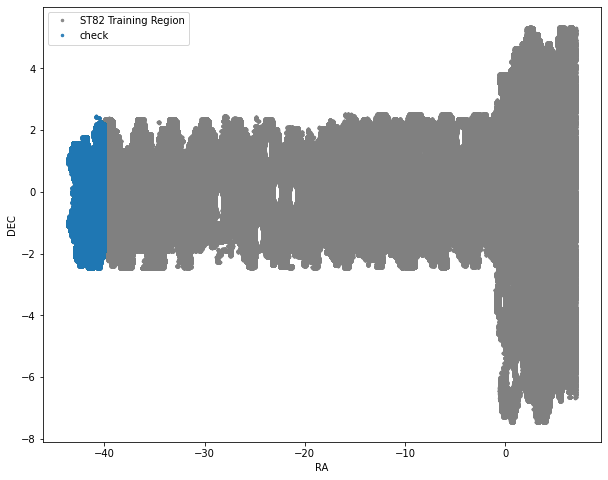

In [9]:
# checking footprint:
# add validation in different color
spatialcheck([gold_st82_train, gold_st82_check], 
             label = ['ST82 Training Region','check'], convert = None, ratag='RA',dectag='DEC')

In [6]:
mask3 = (gold['RA']>310) & (gold['RA']<320)
mask3 = mask3 & (gold['DEC']>-10) & (gold['DEC']<10)
gold_check = gold[mask3]

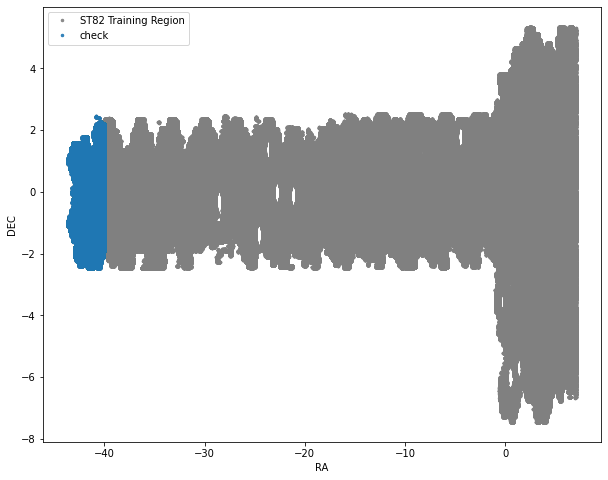

In [11]:
# checking footprint:
# add validation in different color
spatialcheck([gold_st82_train, gold_check], 
             label = ['ST82 Training Region','check'], convert = None, ratag='RA',dectag='DEC')

In [7]:
#raw -- without any masks applied to the data

print(gold_check.size)
print(gold_st82_check.size)

1050624
1050624


In [8]:
# are these the same exact objects?

mask = np.in1d(gold_st82_check['COADD_OBJECT_ID'], gold_check['COADD_OBJECT_ID'])
gal_diff = gold_st82_check[~mask]

gold_st82_check2 = gold_st82_check[mask]

print(gal_diff)

mask3 = np.in1d(gold_check['COADD_OBJECT_ID'], gold_st82_check['COADD_OBJECT_ID'])
gal_diff3 = gold_check[~mask3]
print(gal_diff3)

gold_check2 = gold_check[mask3]

# from this:
# probably the gold catalog dropped some old objects and included completely different ones instead

[]
[]


In [9]:
# only keep the same objects for the next comparison----

print(gold_check2.size)
print(gold_st82_check2.size)

1050623
1050623


In [17]:
#find the same object in the other catalog and compare the postition 
#to see if they really have different ra/dec

#galaxy = gold_check[gold_check['COADD_OBJECT_ID']==195344779]
#print(galaxy)

In [10]:
# NOT THIS CELL # apply the keepGoodRegion cut:

gold_st82_check = keepGoodRegion(gold_st82_check2)
gold_check = keepGoodRegion(gold_check2)
print(gold_st82_check.size)
print(gold_check.size)

# check this galaxy -- matching with 1d
# check position RA DEC
#mask = np.in1d(gold_check['COADD_OBJECT_ID'], gold_st82_check['COADD_OBJECT_ID'])
#gal_diff = gold_check[~mask]

#mask2 = np.in1d(gold_st82_check['COADD_OBJECT_ID'], gold_check['COADD_OBJECT_ID'])
#gal_diff2 = gold_st82_check[~mask2]

#print(gal_diff2.size)
#print(gal_diff2['RA'], gal_diff2['DEC'])

#plot mag/colors of missing object

852741
852741


In [ ]:
# nothing different with keepGoodRegion cut //

In [15]:
#print(gal_diff2['COADD_OBJECT_ID'])

[195344779]


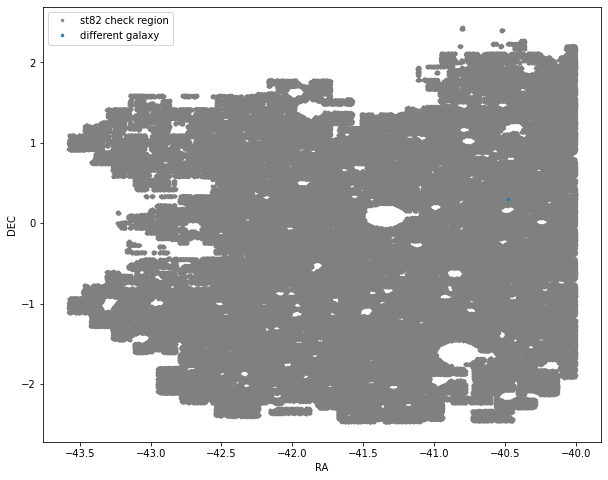

In [11]:
# checking footprint:
# add validation in different color
spatialcheck([gold_st82_check, gal_diff], 
             label = ['st82 check region', 'different galaxy'], convert = None, ratag='RA',dectag='DEC')

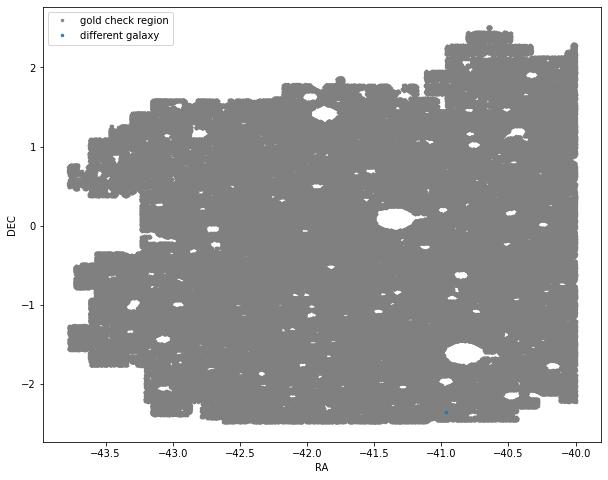

In [16]:
# checking footprint:
# add validation in different color
spatialcheck([gold_check, gal_diff3], 
             label = ['gold check region', 'different galaxy'], convert = None, ratag='RA',dectag='DEC')

In [9]:
def mixing_colors(data, suffix = '', 
    mag = ['MAG_DETMODEL', 'MAG_DETMODEL'], 
    err = [ 'MAGERR_DETMODEL','MAGERR_DETMODEL'], 
    filter = ['G', 'R', 'I'],
    sdss = None, cmass = None, elg=None,
    no_zband = True  ):
    
    magtag = [ m+'_'+f+suffix for m in mag for f in filter ]
    errtag = [ e+'_'+f for e in err for f in filter ]
    del magtag[0], errtag[0]
    if 'Z' in filter: del magtag[2], errtag[2]
    #print(magtag)

    X = [ data[mt] for mt in magtag ]
    Xerr = [ data[mt] for mt in errtag ]
    #reddeningtag = 'XCORR_SFD98'

    X = np.vstack(X).T
    Xerr = np.vstack(Xerr).T
    # mixing matrix
    W = np.array([
                  [1, 0, 0, 0, 0, 0],    # r mag
                  [0, 1, 0, 0, 0, 0],    # i mag
                  [0, 0, 1, -1, 0, 0],   # g-r
                  [0, 0, 0, 1, -1, 0],   # r-i
                  [0, 0, 0, 0, 1, -1]])  # i-z

    if 'Z' not in filter: W = W[:-1,:-1]
    X = np.dot(X, W.T)

    Xcov = np.zeros(Xerr.shape + Xerr.shape[-1:])
    Xcov[:, list(range(Xerr.shape[1])), list(range(Xerr.shape[1]))] = Xerr**2
    Xcov = np.tensordot(np.dot(Xcov, W.T), W, (-2, -1))
    return X, Xcov

Using central 100% to set range.


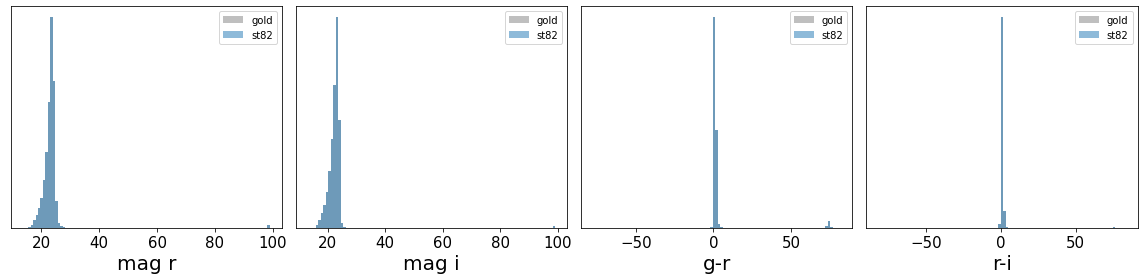

In [10]:
# only compare the same galaxies:
# before priorCut:

X_gold, Xcov_gold = mixing_colors(gold_check)
X_sample_gold = X_gold
X_st82, Xcov_st82 = mixing_colors(gold_st82_check)
X_sample_st82 = X_st82

# Comparison. st82 vs. gold sample from the fitted gaussian mixture model (visual)
doVisualization_1d( data=[X_sample_gold, X_sample_st82], 
                   labels = ['mag r', 'mag i', 'g-r', 'r-i'], 
                   ranges = None, 
                   name = ['gold', 'st82'], 
                   weight = [None,None],
                   nbins=100)

In [11]:
# Apply the same color/mag cuts to exclude extreme color/mag sources //
# gold_2_2 is not the most recent --- post on dmass channel for version differences 

mask_magcut = priorCut_test(gold_check)
gold_check = gold_check[mask_magcut]
print(gold_check.size)

mask_magcut = priorCut_test(gold_st82_check)
gold_st82_check = gold_st82_check[mask_magcut]
print(gold_st82_check.size)

291741
291741


In [16]:
#After applying PriorCut, compare color/mag values, not ra/dec

mask_mag = np.in1d(gold_st82_check['COADD_OBJECT_ID'], gold_check['COADD_OBJECT_ID'])
gal_diff_mag = gold_st82_check[~mask_mag]
same = gold_st82_check[mask_mag]

print(gal_diff_mag.size)
print(same.size)

#If you find any trend in color/mag comparison, that means we may need to re-train. 
#If the difference is random, we are good to go without training

#plot diagonal plots for each color/mag used for training, and also (g-r), (r-i) color comparisons.

742
228132


Using central 100% to set range.


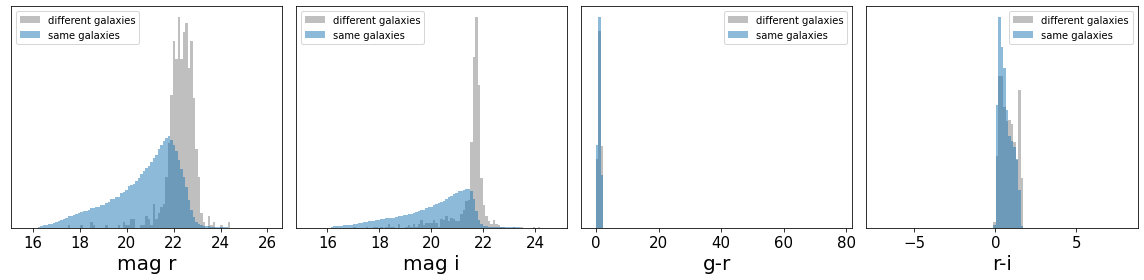

In [18]:
X_gold_dif, Xcov_gold_dif = mixing_colors(gal_diff_mag)
X_sample_gold_dif = X_gold_dif
X_same, Xcov_same = mixing_colors(same)
X_sample_same = X_same

# Comparison. st82 vs. gold sample from the fitted gaussian mixture model (visual)
doVisualization_1d( data=[X_sample_gold_dif, X_sample_same], 
                   labels = ['mag r', 'mag i', 'g-r', 'r-i'], 
                   ranges = None, 
                   name = ['different galaxies', 'same galaxies'], 
                   weight = [None,None],
                   nbins=100)

#doVisualization_1d( data=[X_sample_same], 
#                   labels = ['mag r', 'mag i', 'g-r', 'r-i'], 
#                   ranges = None, 
#                   name = ['same galaxies'], 
#                   weight = [None,None],
#                   nbins=100)

228235
228874
Using central 100% to set range.
Using central 100% to set range.


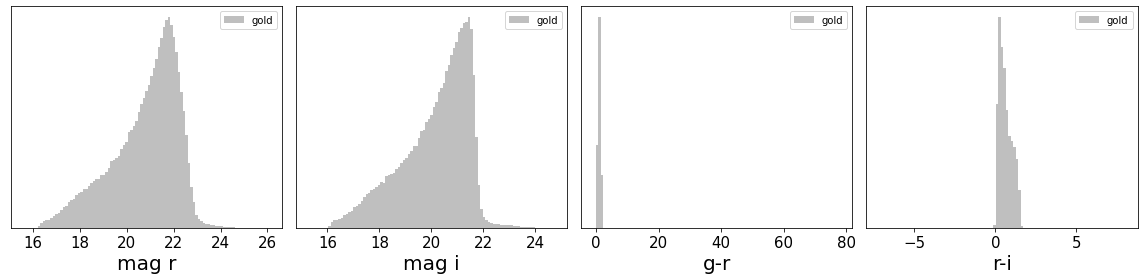

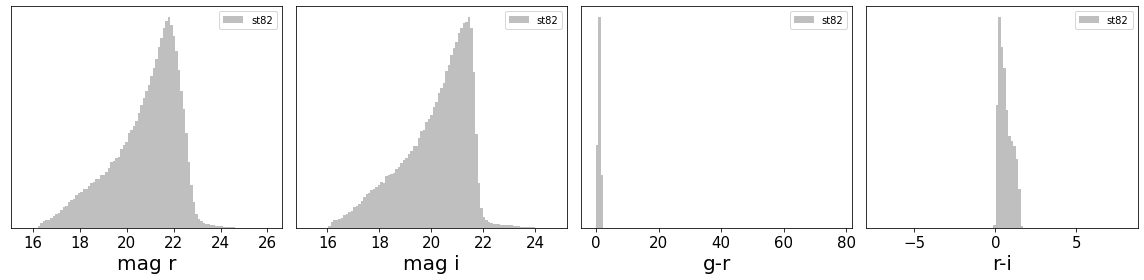

In [14]:
# plot color distributions and mag distributions ***** to justify the rerun of model 
# what is different between the samples

X_gold, Xcov_gold = mixing_colors(gold_check)
X_sample_gold = X_gold
X_st82, Xcov_st82 = mixing_colors(gold_st82_check)
X_sample_st82 = X_st82

# Comparison. st82 vs. gold sample from the fitted gaussian mixture model (visual)
doVisualization_1d( data=[X_sample_gold], 
                   labels = ['mag r', 'mag i', 'g-r', 'r-i'], 
                   ranges = None, 
                   name = ['gold'], 
                   weight = [None,None],
                   nbins=100)

doVisualization_1d( data=[X_sample_st82], 
                   labels = ['mag r', 'mag i', 'g-r', 'r-i'], 
                   ranges = None, 
                   name = ['st82'], 
                   weight = [None,None],
                   nbins=100)

In [12]:
st82_diff = gold_st82_check[(gold_st82_check['EXTENDED_CLASS_MASH_SOF'] != 3)]
gold_diff = gold_check[(gold_check['EXTENDED_CLASS_MASH_SOF'] != 3)]

gold_st82_check = gold_st82_check[(gold_st82_check['EXTENDED_CLASS_MASH_SOF'] == 3)]
print(gold_st82_check.size)
gold_check = gold_check[(gold_check['EXTENDED_CLASS_MASH_SOF'] == 3)]
print(gold_check.size)

109492
109492


In [ ]:
# check the differences
# new model compared to old model from gold 2.2
# validation region check
# on slides

# ask people the produced the catalogs --- "release note" first ***

In [ ]:
def priorCut_test(data):
    ## Should add MODEST_CLASS cut later.
    modelmag_g_des = data['SOF_CM_MAG_CORRECTED_G']
    modelmag_r_des = data['SOF_CM_MAG_CORRECTED_R']
    modelmag_i_des = data['SOF_CM_MAG_CORRECTED_I']
    cmodelmag_g_des = data['SOF_CM_MAG_CORRECTED_G']
    cmodelmag_r_des = data['SOF_CM_MAG_CORRECTED_R']
    cmodelmag_i_des = data['SOF_CM_MAG_CORRECTED_I']
    magauto_des = data['SOF_CM_MAG_CORRECTED_I']

    cut = (((cmodelmag_r_des > 16) & (cmodelmag_r_des <24)) &
           ((cmodelmag_i_des > 16) & (cmodelmag_i_des <24)) &
           ((cmodelmag_g_des > 16) & (cmodelmag_g_des <24)) &
           ((modelmag_r_des - modelmag_i_des ) < 1.5 ) & # 10122 (95%)
           ((modelmag_r_des - modelmag_i_des ) > 0. ) & # 10120 (95%)
           ((modelmag_g_des - modelmag_r_des ) > 0. ) & # 10118 (95%)
           ((modelmag_g_des - modelmag_r_des ) < 2.5 ) & # 10122 (95%)
           (magauto_des < 21.5 ) #&  10124 (95%)
        )
    return cut

In [ ]:
# checking footprint:
# add validation in different color
spatialcheck([gold_st82], 
             label = ['Full GOLD'], convert = None, ratag='RA',dectag='DEC')

In [13]:
# cutting away st82 region: --- making st82 region a mask
#squeue -A PCON0008 (to check how much space on OSC)

'''
print(gold.size)
print(gold_st82_train.size)
mg1, mg2, _ = esutil.htm.HTM(10).match(gold['COADD_OBJECT_ID'], gold_st82_train['COADD_OBJECT_ID'], \
                                         maxmatch=1)
st82_mask = np.zeros(gold.size, dtype=bool)
st82_mask[mg1] = 1
st82_data, spt_data = gold[st82_mask], gold[~st82_mask]

#clean_cmass_data_sdss = train_sample[mg1]           # common galaxies in cmass catalog
'''

"\nprint(gold.size)\nprint(gold_st82_train.size)\nmg1, mg2, _ = esutil.htm.HTM(10).match(gold['COADD_OBJECT_ID'], gold_st82_train['COADD_OBJECT_ID'],                                          maxmatch=1)\nst82_mask = np.zeros(gold.size, dtype=bool)\nst82_mask[mg1] = 1\nst82_data, spt_data = gold[st82_mask], gold[~st82_mask]\n\n#clean_cmass_data_sdss = train_sample[mg1]           # common galaxies in cmass catalog\n"

In [12]:
# check numpy.in1d function.
# This function compares array1 and array2, and then produces a mask for array1 
# to select components that exist in both arrays.

st82_mask = np.in1d(gold['COADD_OBJECT_ID'], gold_st82_train['COADD_OBJECT_ID'], assume_unique=False, invert=False)

gold_spt = gold[~st82_mask]
# produce two masks for each array, and then mask them to leave components in common, 
#then would sort them in order.

gold_st82_check = gold[st82_mask]

index_mask = np.argsort(gold_spt['HPIX_4096'])
gold_spt_chron = gold_spt[index_mask] # ordered by hpix values


print(gold_spt_chron.size)
print(gold_st82_check.size)

36306967
1854199


In [12]:
import numpy as np
import pandas as pd

# First catalog to be matched
#catdir = '/Users/amichoi/src/LEPHARE/ami_spherex_richardsims_shallow/'
#file1 = open('%s/sedcat_df_1000_2000_obsf_306sphxfilts_gama.csv' %catdir)
#data1 = np.loadtxt(file1, delimiter=',',skiprows=1)
#file1.close()
tractor_id = gold['COADD_OBJECT_ID'].copy()

# Load second catalog into pandas dataframe
from astropy.table import Table
df = pd.DataFrame(gold_st82_train)
#df = gold_st82_train.to_pandas()

tractor_id2 = df['COADD_OBJECT_ID']
#pix = df['HPIX_4096']
# This command finds the i magnitude values for the tractor_id2 values that match tractor_id
tmp = tractor_id2.loc[tractor_id2.isin(tractor_id)]
# This just sets a new variable equal to the matched imag values
obj_same = tmp.values
print(obj_same.shape)

(9826682,)


In [26]:
print(obj_same)
print(gold.size)
st82_mask = np.in1d(gold['HPIX_4096'], obj_same, assume_unique=False, invert=False)
gold_spt_pd = gold[~st82_mask]
print(gold_spt_pd.size)

[76923617 74105949 74115431 ... 77930012 77950055 77929999]
38161166
36305974


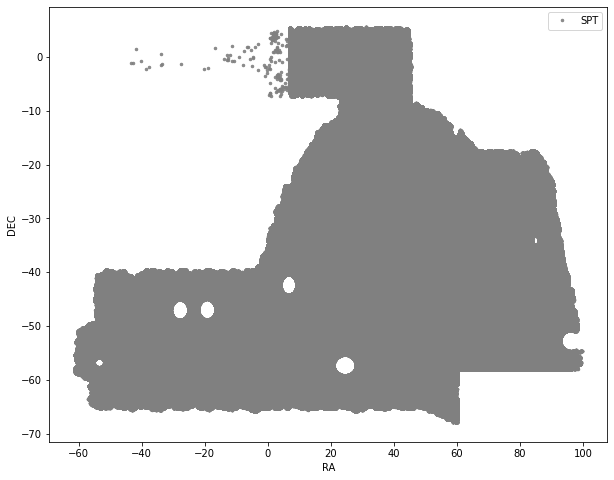

In [27]:
# spt footprint using pandas (and numpy)
spatialcheck([gold_spt_pd], 
             label = ['SPT'], convert = None, ratag='RA',dectag='DEC')

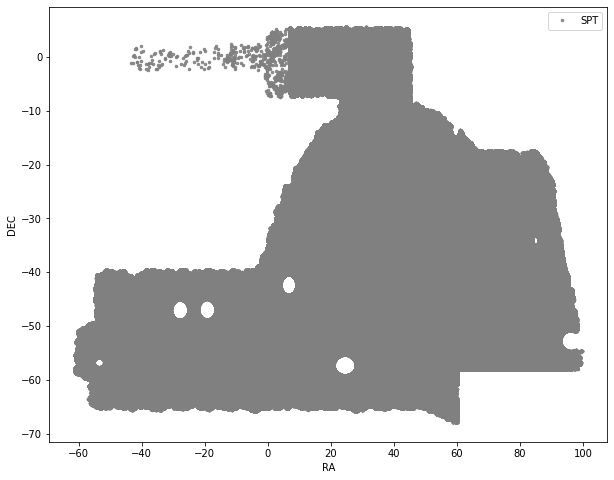

In [13]:
# recheck spt footprint using numpy
spatialcheck([gold_spt_chron], 
             label = ['SPT'], convert = None, ratag='RA',dectag='DEC')

# check magnitudes
# add cut of >-10 to look at only st82 region
# plot histograms

In [27]:
# save gold_spt as fits file:

outdir = '../output/test/train_cat/y3/'
os.makedirs(outdir, exist_ok=True)
esutil.io.write( outdir+'gold_spt.fits', gold_spt, overwrite=True)

In [28]:
# clear the memory of gold_st82 and full gold catalog here

gold = []
gold_st82 = []